In [125]:
import pandas as pd 
import numpy as np
import newspaper
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [126]:
import nltk
import re 
import autocorrect
import string 
from nltk import word_tokenize
from string import punctuation
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

In [127]:
from nltk.stem import SnowballStemmer
#is based on The Porter Stemming Algorithm
def stemming_lemmatization(text):
    snowball_stemmer = SnowballStemmer('english')
    return snowball_stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
#print(stemming(word_tokenize(tokens)))

In [128]:
def remove_html_nums(text):
    cleaned_text = re.sub('<[^<]+?>','', text)
    output = ''.join(c for c in cleaned_text if not c.isdigit())
    return output
#print (remove_html_nums(raw_data))

from string import punctuation
def remove_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)
#print (remove_punctuation(raw_data))

"""Converting text to lower case"""
def to_lower(text):
    return ' '.join([w.lower() for w in word_tokenize(text)])
#print (to_lower(raw_data))

In [129]:
import pandas as pd
data = pd.read_csv('training.csv', error_bad_lines=False);
data2 = pd.read_csv('validation.csv', error_bad_lines=False);
data_text = data[['Tweet']]
data_text2 = data2[['Tweet']] 
data_text['index'] = data_text.index
data_text2['index'] = data_text2.index
documents = data_text
doc2 = data_text2
data_text2.head()

C:\Users\sarthak\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\sarthak\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Tweet,index
0,Forgot to a math test and I was failing but my...,0
1,Corona effected came from Delhi in Bihar lakhi...,1
2,Make CORONA END NA,2
3,Imagine if the coronavirus pandemic was a big ...,3
4,Howdy Ana. Where can I get married during the ...,4


In [130]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(stemming_lemmatization(token))
    return result

In [131]:
doc_sample = documents[documents['index'] == 5].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Coronavirus', 'impact', 'Govt', 'extends', 'I-T', 'deadlines', 'related', 'to', 'Sections', '80C,', '80D']


 tokenized and lemmatized document: 
['coronavirus', 'impact', 'govt', 'extend', 'deadlin', 'relat', 'section']


In [132]:
processed_docs = documents['Tweet'].map(preprocess)
processed_doc2 = doc2['Tweet'].map(preprocess)
processed_docs[:10]

0                                 [joke, plane, covid]
1    [banmediahous, respons, spread, fake, communal...
2             [wait, corona, thing, april, fool, joke]
3        [liar, prove, night, time, lie, truth, covid]
4    [coronavirus, death, toll, reach, near, death,...
5    [coronavirus, impact, govt, extend, deadlin, r...
6    [peopl, die, china, covid, china, underreport,...
7    [dear, chines, kind, cook, thorough, time, reg...
8    [govt, kenya, check, temperatur, covid, say, m...
9    [mental, health, hasn, suffer, coronavirus, qu...
Name: Tweet, dtype: object

In [133]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 covid
1 joke
2 plane
3 banmediahous
4 communal
5 corona
6 fake
7 pandem
8 respons
9 situat
10 spread


In [134]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(4, 1), (16, 1), (86, 1), (103, 1)]

In [135]:
bow_doc_5 = bow_corpus[5]
for i in range(len(bow_doc_5)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_5[i][0], 
                                               dictionary[bow_doc_5[i][0]], 
bow_doc_5[i][1]))

Word 16 ("coronavirus") appears 1 time.
Word 23 ("govt") appears 1 time.
Word 24 ("impact") appears 1 time.
Word 25 ("relat") appears 1 time.


In [136]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.48127422103839773), (1, 0.876570090844927)]


In [137]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.181*"corona" + 0.098*"virus" + 0.023*"coronavirus" + 0.020*"dont" + 0.019*"want" + 0.018*"fool" + 0.018*"april" + 0.018*"go" + 0.016*"tell" + 0.013*"peopl"
Topic: 1 
Words: 0.118*"corona" + 0.060*"coronavirus" + 0.036*"virus" + 0.029*"shit" + 0.029*"stay" + 0.020*"home" + 0.018*"good" + 0.017*"year" + 0.017*"today" + 0.017*"case"
Topic: 2 
Words: 0.101*"corona" + 0.048*"coronavirus" + 0.046*"covid" + 0.036*"like" + 0.031*"virus" + 0.024*"posit" + 0.019*"test" + 0.016*"april" + 0.016*"live" + 0.014*"feel"
Topic: 3 
Words: 0.105*"covid" + 0.101*"coronavirus" + 0.045*"april" + 0.037*"joke" + 0.036*"fool" + 0.025*"peopl" + 0.017*"go" + 0.017*"trump" + 0.013*"corona" + 0.011*"tomorrow"
Topic: 4 
Words: 0.149*"covid" + 0.059*"coronavirus" + 0.051*"case" + 0.038*"death" + 0.037*"total" + 0.022*"corona" + 0.020*"say" + 0.016*"confirm" + 0.015*"take" + 0.013*"govern"
Topic: 5 
Words: 0.116*"corona" + 0.057*"coronavirus" + 0.021*"think" + 0.020*"covid" + 0.020*"april" + 0.020*

In [138]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.042*"corona" + 0.032*"april" + 0.031*"virus" + 0.028*"fool" + 0.026*"joke" + 0.020*"shit" + 0.018*"coronavirus" + 0.018*"test" + 0.017*"wait" + 0.015*"wonder"
Topic: 1 Word: 0.035*"covid" + 0.028*"case" + 0.025*"corona" + 0.021*"like" + 0.021*"coronavirus" + 0.020*"virus" + 0.017*"india" + 0.015*"good" + 0.013*"fuck" + 0.012*"march"
Topic: 2 Word: 0.026*"corona" + 0.025*"april" + 0.024*"coronavirus" + 0.023*"fool" + 0.021*"virus" + 0.018*"live" + 0.017*"joke" + 0.014*"right" + 0.014*"death" + 0.013*"covid"
Topic: 3 Word: 0.037*"coronavirus" + 0.023*"covid" + 0.022*"think" + 0.021*"corona" + 0.020*"get" + 0.019*"peopl" + 0.018*"trump" + 0.017*"virus" + 0.013*"want" + 0.012*"famili"
Topic: 4 Word: 0.032*"test" + 0.032*"covid" + 0.026*"coronavirus" + 0.021*"corona" + 0.017*"virus" + 0.016*"posit" + 0.015*"peopl" + 0.015*"home" + 0.013*"month" + 0.012*"break"
Topic: 5 Word: 0.042*"covid" + 0.026*"coronavirus" + 0.025*"corona" + 0.018*"fight" + 0.018*"virus" + 0.016*"peopl"

In [139]:
# processed_docs[6]

['peopl', 'die', 'china', 'covid', 'china', 'underreport', 'accord', 'sourc']

In [140]:
for index, score in sorted(lda_model[bow_corpus[6]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.8499525189399719	 
Topic: 0.196*"coronavirus" + 0.035*"test" + 0.023*"covid" + 0.021*"trump" + 0.018*"think" + 0.016*"like" + 0.014*"posit" + 0.014*"break" + 0.013*"work" + 0.013*"look"

Score: 0.01667800173163414	 
Topic: 0.105*"covid" + 0.101*"coronavirus" + 0.045*"april" + 0.037*"joke" + 0.036*"fool" + 0.025*"peopl" + 0.017*"go" + 0.017*"trump" + 0.013*"corona" + 0.011*"tomorrow"

Score: 0.016675708815455437	 
Topic: 0.149*"covid" + 0.059*"coronavirus" + 0.051*"case" + 0.038*"death" + 0.037*"total" + 0.022*"corona" + 0.020*"say" + 0.016*"confirm" + 0.015*"take" + 0.013*"govern"

Score: 0.016672000288963318	 
Topic: 0.116*"corona" + 0.057*"coronavirus" + 0.021*"think" + 0.020*"covid" + 0.020*"april" + 0.020*"peopl" + 0.019*"come" + 0.018*"like" + 0.018*"time" + 0.017*"go"

Score: 0.01667160354554653	 
Topic: 0.122*"coronavirus" + 0.051*"fool" + 0.049*"april" + 0.043*"covid" + 0.028*"joke" + 0.025*"corona" + 0.019*"like" + 0.016*"gonna" + 0.015*"come" + 0.015*"isnt"

Score: 

In [141]:
for index, score in sorted(lda_model_tfidf[bow_corpus[6]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.8499590158462524	 
Topic: 0.035*"covid" + 0.028*"case" + 0.025*"corona" + 0.021*"like" + 0.021*"coronavirus" + 0.020*"virus" + 0.017*"india" + 0.015*"good" + 0.013*"fuck" + 0.012*"march"

Score: 0.016673175618052483	 
Topic: 0.037*"coronavirus" + 0.023*"covid" + 0.022*"think" + 0.021*"corona" + 0.020*"get" + 0.019*"peopl" + 0.018*"trump" + 0.017*"virus" + 0.013*"want" + 0.012*"famili"

Score: 0.016672654077410698	 
Topic: 0.042*"covid" + 0.026*"coronavirus" + 0.025*"corona" + 0.018*"fight" + 0.018*"virus" + 0.016*"peopl" + 0.015*"spread" + 0.014*"come" + 0.013*"tri" + 0.013*"fuck"

Score: 0.016672447323799133	 
Topic: 0.032*"test" + 0.032*"covid" + 0.026*"coronavirus" + 0.021*"corona" + 0.017*"virus" + 0.016*"posit" + 0.015*"peopl" + 0.015*"home" + 0.013*"month" + 0.012*"break"

Score: 0.016671501100063324	 
Topic: 0.026*"covid" + 0.021*"corona" + 0.018*"coronavirus" + 0.016*"virus" + 0.014*"like" + 0.014*"summer" + 0.013*"need" + 0.013*"say" + 0.013*"away" + 0.012*"friend"



In [142]:
unseen_document = data_text2[data_text2['index'] == 5].values[0][0]
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.7749410271644592	 Topic: 0.080*"corona" + 0.060*"coronavirus" + 0.038*"april" + 0.038*"covid" + 0.034*"fool"
Score: 0.02501233108341694	 Topic: 0.196*"coronavirus" + 0.035*"test" + 0.023*"covid" + 0.021*"trump" + 0.018*"think"
Score: 0.0250115804374218	 Topic: 0.101*"corona" + 0.048*"coronavirus" + 0.046*"covid" + 0.036*"like" + 0.031*"virus"
Score: 0.02500714734196663	 Topic: 0.105*"covid" + 0.101*"coronavirus" + 0.045*"april" + 0.037*"joke" + 0.036*"fool"
Score: 0.025006810203194618	 Topic: 0.093*"corona" + 0.077*"coronavirus" + 0.055*"fuck" + 0.036*"virus" + 0.030*"death"
Score: 0.025006243959069252	 Topic: 0.122*"coronavirus" + 0.051*"fool" + 0.049*"april" + 0.043*"covid" + 0.028*"joke"
Score: 0.02500421181321144	 Topic: 0.118*"corona" + 0.060*"coronavirus" + 0.036*"virus" + 0.029*"shit" + 0.029*"stay"
Score: 0.025003960356116295	 Topic: 0.116*"corona" + 0.057*"coronavirus" + 0.021*"think" + 0.020*"covid" + 0.020*"april"
Score: 0.025003895163536072	 Topic: 0.149*"covid" + 

In [148]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

NameError: name 'df_dominant_topic' is not defined

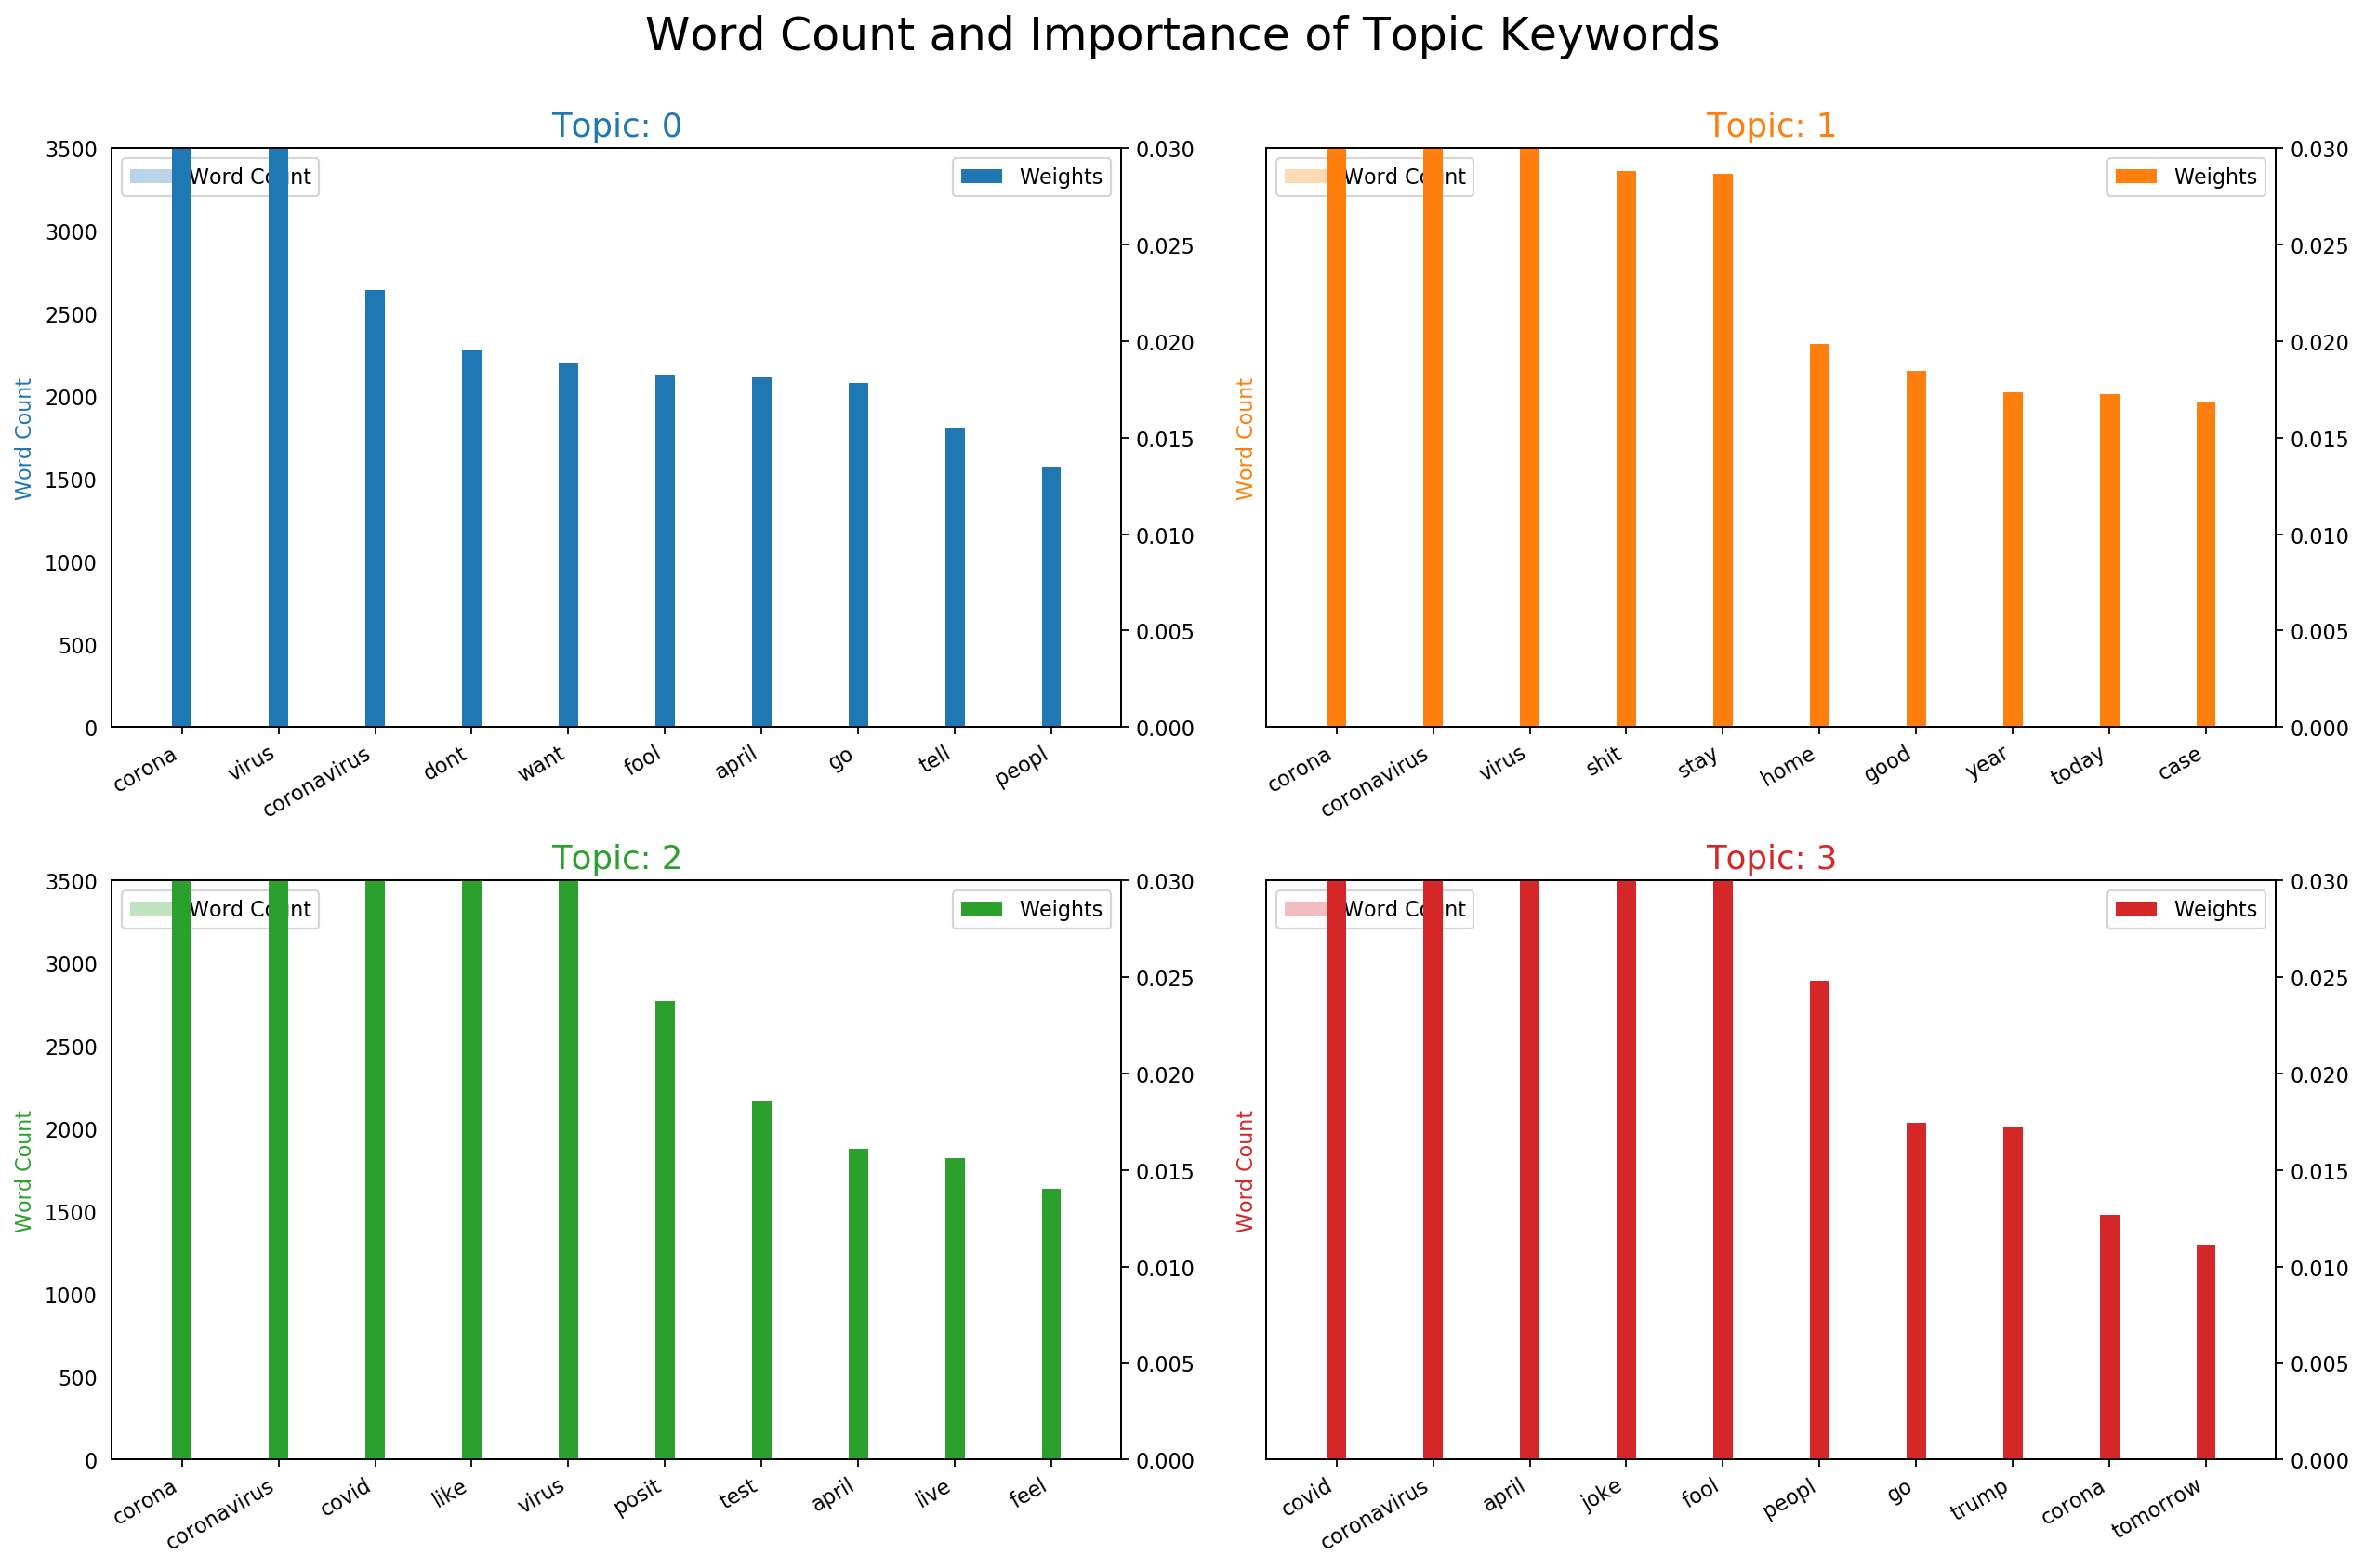

In [150]:
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_text2 for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()